# Part.01 : RAG 기초 이론 & 실습

## CH01.RAG의 개요 및  개념

### RAG (Retrieval-Augmented Generation)
자연어 처리 (NLP) 분야에서 사용되는 기술로 정보 검색을 통해 언어 생성 과정을 향상 시키는 방식

### RAG의 작동 원리
1. 정보 검색 단계 : 사용자의 질문이나 입력에 가장 관련성이 높은 정보를 데이터베이스나 인터넷에사 찾음, 이 과정에서 질문에 답할 수 있는 콘텐츠나 문서를 선택하기 위해 유사도 검색 같은 기술이 사용
2. 언어 생성 단계 : 검색된 정보를 바탕으로, 생성 모델을 생성, 생성 모델은 검색된 콘텐츠를 활용하여 보다 정확하고 정보에 기반한 답변을 생성

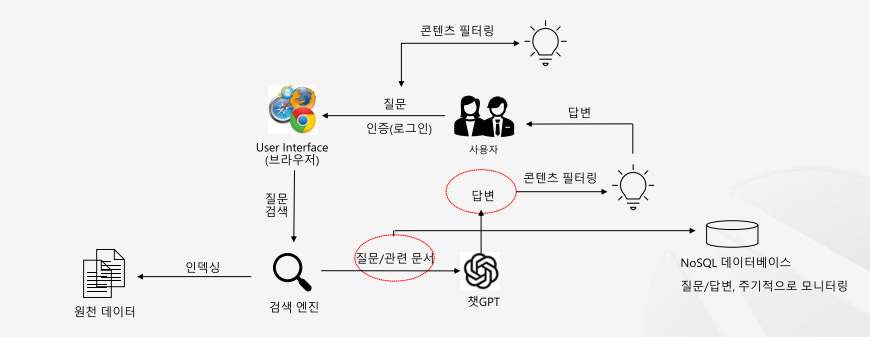


### RAG 파이프라인
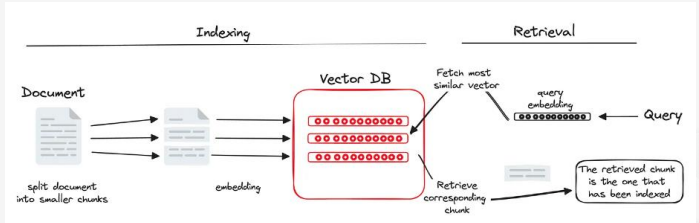
- 문장을 단어로 분리한 다음에 임베딩 처리를 하면 Vector로 추출된 것을 Vector DB에 저장
- Retrieval 사용자가 질문을 하면 질문 한 텍스트도 동일하게 Vector로 변환을 해서 Vector DB와 유사도 검색(코사인 유사도, 유클리드 )을 해서 LLM 모델에 청크 데이터를 보내서 처리 후 사용자에게 출력

### RAG 개요
- RAG는 언제 사용하는가?  
    <파인튜닝이 필요한 요건>  
    1. 특정 도메인에 최적화된 모델이 필요한 경우  
    2. 고유한 비즈니스 요구사항 충족이 필요한 경우  
    3. 모델이 사실이 아닌 진술을 하는경우  
    4. 모델 결과의 정확도가 사용자의 기대치에 미치지 못하는 경우  

    <파인튜닝의 제약사항>
    1. 파인튜닝을 위해 GPU 필요
    2. 얼마나 학습을 시켜야 원하는 결과가 나오는지 알기 어려움
    3. 데이터가 변경될 때마다 추가 학습 필요
    4. 질문과 다변으로 구성된 데이터 준비
    5. 방대한 분량이 데이터 준비
    6. 파인튜닝 비용

    <RAG가 필요한 요건>
    1. 개인/기업 데이터를 LLM과 연계하여 서비스를 하고자 할 때
    2. 실시간으로 변화하는 정보를 반영해야 하는 경우
    3. 다양한 정보를 통합한 질의 응답 시스템을 구축하고자 할 때

    <RAG의 제약사항>
    1. 정보 검색의 정확도
    2. 처리 속도와 효율성
    3. 복잡도와 자원 요구 사항
    4. 정보 손실  
        4-1) 임베딩 벡터 과정에서의 손실 : 문서가 긴 경우에 정해진 벡터의 차원으로 표현하기 어려울 수 있음  
        4-2) 검색 과정에서의 손실 : 질문과 문서 사이의 관려성이 떨어질 수 있음 -> Reranking으로 해결 가능

    <RAG 구현시 데이터 흐름 : 검색 측면>
    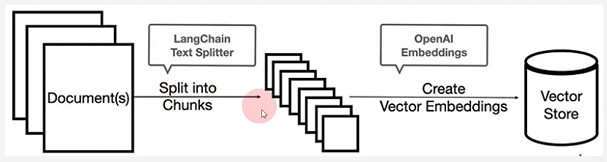  
            Chunks : 문장을 단어 단위로 나누는 과정  
            Embedding : Vector로 변화를 해서 DB 저장 (Chroma,FAISS,Pinecone)

    <RAG 구현시 데이터 흐름 : 생성 측면>
    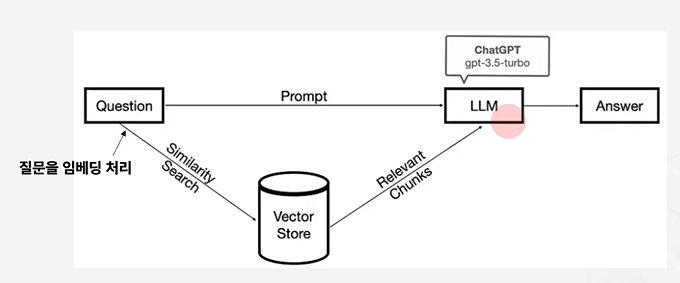  
            질문도 임배딩 처리 해서 Vector Store 와 유사도를 측정해서 Chunks로 LLM에 전달
    
    <RAG 구현시 데이터 흐름 : 전체 흐름>
    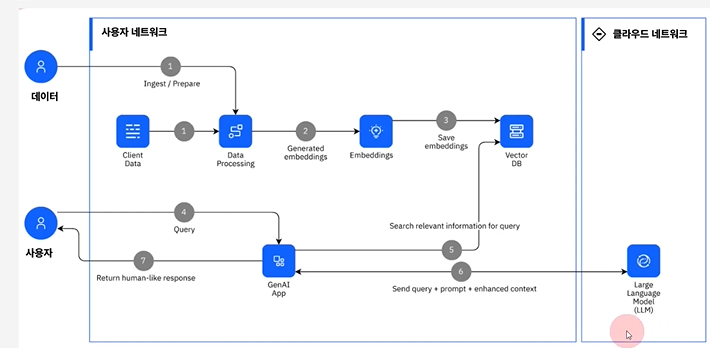
    


## CH.02  청킹 (Chunking)

### 청킹 (Chunking)
- LLM에서 청킹 (Chunking)은 긴 텍스트 데이터를 더 작은 단위로 나누는 과정을 의미  
    - 입력 데이터의 크기에 대한 제한  
    - 처리 시간 단축  
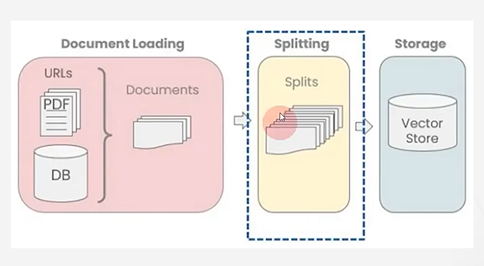  
 -> Splitthing 하는 과정을 Chunking이라고도 한다

- Chunk_size 와 Chunk_overloop  
    - Chunk_size는 문장을 어느 정도의 크기로 할지 정하는 것
    - Chunk_overloop는 앞,뒤 Chunk_size를 연결 해줄지 말지 결정하는것

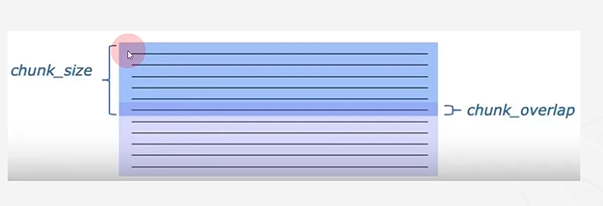





In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter, CharacterTextSplitter

text = """Content filters work by identifying online communication that needs to be filtered such as website URLs, emails, or SMS. \
By categorizing the form of communication based on filters set by the user the system \
can compare the categorized online communication to a list of restricted content. Based on the comparison \n\n  \
the system decides to allow or block access the users access to the content. Content filtering can be performed on different levels. \
Using email filters, web filters, or messaging filters you can analyze the content of emails, web pages, \
or messages, blocking or allowing them based on specific criteria, such as keywords or categories.\
to certain websites or applications based on specific policies set by an organization."""


In [ ]:
chunk_size =26
chunk_overlap = 4


# 문장을 단어로 나누어 준다
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap
)
c_splitter = CharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap
)

In [ ]:
c_splitter.split_text(text)

Created a chunk of size 313, which is longer than the specified 26


['Content filters work by identifying online communication that needs to be filtered such as website URLs, emails, or SMS. By categorizing the form of communication based on filters set by the user the system can compare the categorized online communication to a list of restricted content. Based on the comparison',
 'the system decides to allow or block access the users access to the content. Content filtering can be performed on different levels. Using email filters, web filters, or messaging filters you can analyze the content of emails, web pages, or messages, blocking or allowing them based on specific criteria, such as keywords or categories.to certain websites or applications based on specific policies set by an organization.']

In [ ]:
r_splitter.split_text(text)

['Content filters work by',
 'by identifying online',
 'communication that needs',
 'to be filtered such as',
 'as website URLs, emails,',
 'or SMS. By categorizing',
 'the form of communication',
 'based on filters set by',
 'by the user the system',
 'can compare the',
 'the categorized online',
 'communication to a list',
 'of restricted content.',
 'Based on the comparison',
 'the system decides to',
 'to allow or block access',
 'the users access to the',
 'the content. Content',
 'filtering can be',
 'be performed on different',
 'levels. Using email',
 'filters, web filters, or',
 'or messaging filters you',
 'you can analyze the',
 'the content of emails,',
 'web pages, or messages,',
 'blocking or allowing them',
 'based on specific',
 'criteria, such as',
 'as keywords or',
 'or categories.to certain',
 'websites or applications',
 'based on specific',
 'policies set by an',
 'an organization.']

In [ ]:
"""Content filters work \
by an organization."""

'Content filters work by an organization.'

In [ ]:
# 철저 하나를 기준으로 짤라서 볼 수 도 있다

chunk_size = 1
chunk_overlap = 0
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap
)

r_splitter.split_text(text)

['C',
 'o',
 'n',
 't',
 'e',
 'n',
 't',
 ' ',
 'f',
 'i',
 'l',
 't',
 'e',
 'r',
 's',
 ' ',
 'w',
 'o',
 'r',
 'k',
 ' ',
 'b',
 'y',
 ' ',
 'i',
 'd',
 'e',
 'n',
 't',
 'i',
 'f',
 'y',
 'i',
 'n',
 'g',
 ' ',
 'o',
 'n',
 'l',
 'i',
 'n',
 'e',
 ' ',
 'c',
 'o',
 'm',
 'm',
 'u',
 'n',
 'i',
 'c',
 'a',
 't',
 'i',
 'o',
 'n',
 ' ',
 't',
 'h',
 'a',
 't',
 ' ',
 'n',
 'e',
 'e',
 'd',
 's',
 ' ',
 't',
 'o',
 ' ',
 'b',
 'e',
 ' ',
 'f',
 'i',
 'l',
 't',
 'e',
 'r',
 'e',
 'd',
 ' ',
 's',
 'u',
 'c',
 'h',
 ' ',
 'a',
 's',
 ' ',
 'w',
 'e',
 'b',
 's',
 'i',
 't',
 'e',
 ' ',
 'U',
 'R',
 'L',
 's',
 ',',
 ' ',
 'e',
 'm',
 'a',
 'i',
 'l',
 's',
 ',',
 ' ',
 'o',
 'r',
 ' ',
 'S',
 'M',
 'S',
 '.',
 ' ',
 'B',
 'y',
 ' ',
 'c',
 'a',
 't',
 'e',
 'g',
 'o',
 'r',
 'i',
 'z',
 'i',
 'n',
 'g',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'f',
 'o',
 'r',
 'm',
 ' ',
 'o',
 'f',
 ' ',
 'c',
 'o',
 'm',
 'm',
 'u',
 'n',
 'i',
 'c',
 'a',
 't',
 'i',
 'o',
 'n',
 ' ',
 'b',
 'a',
 's',
 'e'

In [ ]:
chunk_size = 2
chunk_overlap = 1
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap
)

r_splitter.split_text(text)

['Co',
 'on',
 'nt',
 'te',
 'en',
 'nt',
 'f',
 'fi',
 'il',
 'lt',
 'te',
 'er',
 'rs',
 'w',
 'wo',
 'or',
 'rk',
 'b',
 'by',
 'i',
 'id',
 'de',
 'en',
 'nt',
 'ti',
 'if',
 'fy',
 'yi',
 'in',
 'ng',
 'o',
 'on',
 'nl',
 'li',
 'in',
 'ne',
 'c',
 'co',
 'om',
 'mm',
 'mu',
 'un',
 'ni',
 'ic',
 'ca',
 'at',
 'ti',
 'io',
 'on',
 't',
 'th',
 'ha',
 'at',
 'n',
 'ne',
 'ee',
 'ed',
 'ds',
 't',
 'to',
 'b',
 'be',
 'f',
 'fi',
 'il',
 'lt',
 'te',
 'er',
 're',
 'ed',
 's',
 'su',
 'uc',
 'ch',
 'a',
 'as',
 'w',
 'we',
 'eb',
 'bs',
 'si',
 'it',
 'te',
 'U',
 'UR',
 'RL',
 'Ls',
 's,',
 'e',
 'em',
 'ma',
 'ai',
 'il',
 'ls',
 's,',
 'o',
 'or',
 'S',
 'SM',
 'MS',
 'S.',
 'B',
 'By',
 'c',
 'ca',
 'at',
 'te',
 'eg',
 'go',
 'or',
 'ri',
 'iz',
 'zi',
 'in',
 'ng',
 't',
 'th',
 'he',
 'f',
 'fo',
 'or',
 'rm',
 'o',
 'of',
 'c',
 'co',
 'om',
 'mm',
 'mu',
 'un',
 'ni',
 'ic',
 'ca',
 'at',
 'ti',
 'io',
 'on',
 'b',
 'ba',
 'as',
 'se',
 'ed',
 'o',
 'on',
 'f',
 'fi',
 'il'

### 청킹 유형 (Chunking)

- CharacterTextSplitter() : 단순하게, 주어진 텍스트를 문자 단위로 분활 -> 텍스트를 그대로 분활
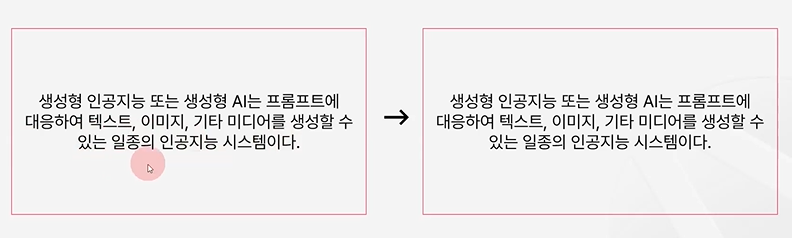

- RecursiveCharacterTextSplitter() : 문서를 재귀적으로 분활 -> 먼저 2줄 띄어쓰기(/n/n1)을 먼저 분활 한 다음에 1줄 띄어쓰기를 분활
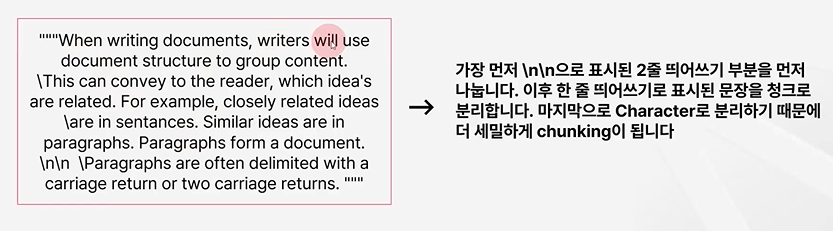


- TokenTextSplitter() : 토큰 수를 기준으로 분활 -> LLM에는 토큰이 지정된 컨텍스트 창이 있는 경우가 많이 때문에 유용하며, 토큰은 일반적으로 최대 4자로 구성

- titoken() : 

### 청킹 고려사항

1. 문맥 손실

2. 청크 경계 처리 : 청크를 나누는 과정에서 문장이 잘리지 않도록 주의

해결 방안 : 청크 경계가 자연스러운 언어 단위 (예: 문장, 문단)에 맞춰지도록 조정하고, 필요한 경우 청크간에 일부 중복을 허용

3. 적절한 청킹 : 적절한 Chunk_size, Chunk_overlap 값 찾기
4. 적절한 방법 (Splitter) 찾기 : 데이터와 서비스에 따라 방법이 다를 수 있음 

## CH.3 검색 유형

### 검색 유형 : 키워드 검색
- 키워드 (Keyword) 검색은 사용자가 입력 하나 또는 여러 키워드를 바탕으로 정보를 찾아내는 과정  
    사용자의 의도롤 파악하지 못하는 단점이 있다  
ex) "기후 변화"에 대해 검색했다면 정확히 "기후 변환"와 매칭되는 문서를 반환


### 검색 유형 : 시맨틱 검색
- 사용자의 질문이나 검색어의 의미를 이해하려고 시도하는 검색 기술, 따라서 사용자의 의도를 파악하고 의미를 이해하는데 중점  
    -   ex) "영화추천"이라고 입력한다면  
        - 사용자 의도 이해 -> 사용자가 단순히 영화에 대한 정보를 원하는 것이 아니라, 새로운 영화를 추천 받고 싶어 한다는 것을 이해  
        - 관련 결과 제공 : 사용자의 위치, 최근 검색 이력, 현재 이기 있는 영화 등의 정보를 종합하여, 개인화된 영화 추천 목록을 제공  
- 사용사례 : 웹 검색 엔진, 전자 상거래 플랫폼, 기업 내부 데이터 검색


=> 의미를 파악하기 위해서는 근간(사용자의 정보)이 되는 정보들이 필요하다.  

### 검색 유형 : 백터 검색
- 백터 검색 (Vector search)은 고차원 백터 공간에서 유사도를 기반으로 정보를 검색하는 기술
    - 동작 원리
        1. 벡터로 변환 (임베딩 과정을 거쳐서 벡터로 변환)
        2. 벡터간 유사도 측정 : 코사인 유사도, 유클리드 거리 등 사용
        3. 유사 항목 검색 : 파이스, 엘라스틱 서치 등 사용 (크로마 DB에서 제공해줌)

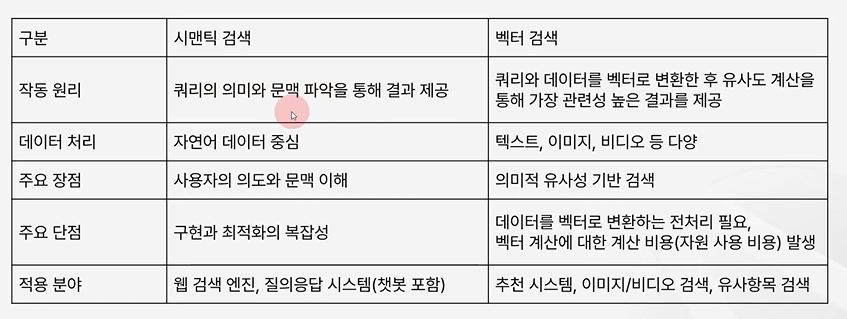
시맨틱 검색 -> 사용할 데이터가 충분해야 되며, 자연어 그래도 사용  
백터 검색 -> 데이터를 백터로 변환해서 사용

### 검색 유형 : 하이브리드 검색

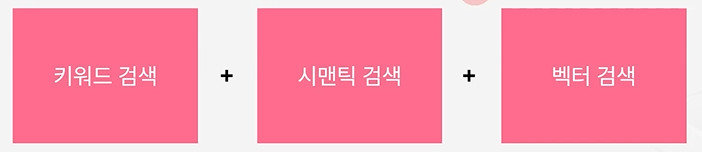

### 검색 알고리즘 : 유사도 검색
- 유사도 검색 (Similarity Search)은 주어진 쿼리 또는 데이터 항목에서 가장 유사한 항목들을 데이터베이스나 데이터집합에서 찾아내는 과정  
-> 데이터를 백터로 변환 해서 사용한다

- 유사도 검색 특징  
    - 고차원 백터 공간에서 수행
    - 유사도 측 : 코사인 유사도, 유클리드 거리, 자카드 유사도 등 다양한 메트릭 사용

#### 유사도 측정 : 유클리드 거리
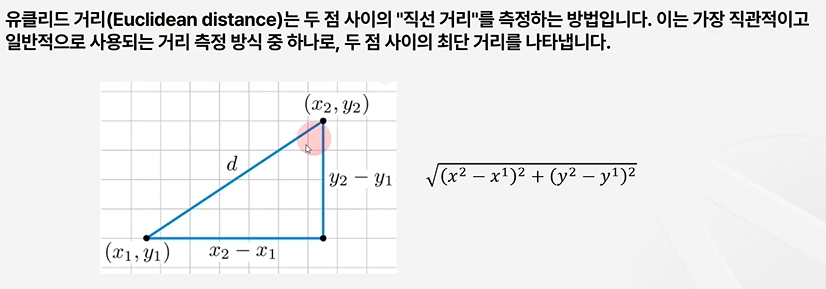





In [ ]:
# 유클리드 거리 구하기

#1. NumPy 모듈 사용
#2. distance.euclidean() 함수 사용
#3. math.dist() 함수 사용

#1번 실행 - norm() 함수 이용
import numpy as np

a = np.array((1, 2, 3))
b = np.array((4, 5, 6))

dist = np.linalg.norm(a - b) # norm a에서 b를 단순하게 빼준다

print(dist)


5.196152422706632


In [ ]:
#NumPy 모듈로 수학 공식 그대로 적용
import numpy as np

a = np.array((1, 2, 3))
b = np.array((4, 5, 6))
# numpy.sum() 함수: 항목의 합계 반환
# numpy.square() 함수: 항목의 제곱을 반환
dist = np.sqrt(np.sum(np.square(a - b))) 

print(dist)

5.196152422706632


### 검색 알고리즘 : 코사인 유사도

- 코사인 유사도 (Cosine Similarty)는 두 벡터의 방향이 완전히 같다면 코사인 유사도는 1이 되고, 90도로 직교한다면 0, 반대 방향이라면 -1이 됩니다.    
<br>
=> a,b 의 각도가 중요하다.
<br>
<br>
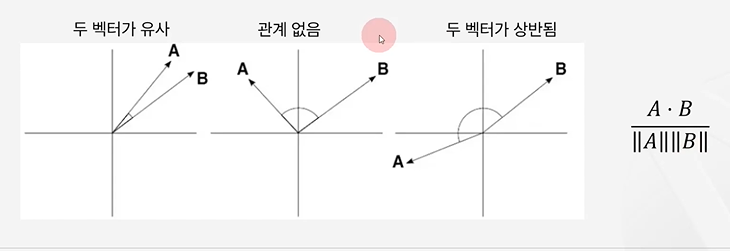


### 검색 알고리즘 : 맨해튼 거리

- 맨해튼 거리 (Manhanttan Distance)는 격자 모형의 경로를 따라 두 점 사이의 거리를 측정하는 방법, 이 거리 측정법은 두 점 사이를 직선으로 이동하는 대신 수평, 수직 방향으로만 이동 할 수 있을 때의 최단 거리를 계산
<br>
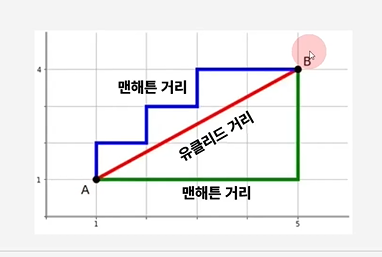

=> 일반적으로 유클리드 거리를 많이 사용한다 


### 검색 알고리즘 : 자카드 유사도 
- 두 집갑 간의 유사도를 측정하는 방법 중 하나로 두 집합이 공유하는 원소의 비율을 통해 유사로 계산 <br>

    - A의 취미 : { 책 읽기, 그림 그리기, 요리하기}
    - B의 취미 : { 책 읽기, 영화 보기, 요리하기}
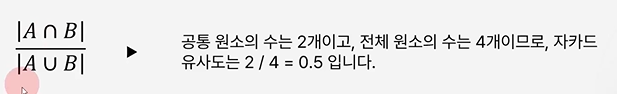

    - 

## CH. 4 백터 데이터베이스 개념

### 백터 데이터베이스 개념
- 벡터 데이터베이스는 고차원 벡터 데이터를 저장하고, 이를 기반으로 유사성 검색을 수행할 수 있는 데이터베이스
    - 주요 특징
        - 고차원 백터 저장
        - 유사도 검색
        - 인덱싱 기반 <br>

    즉, 데이터를 저장하고 유사성 검색이 가능해야 한다.

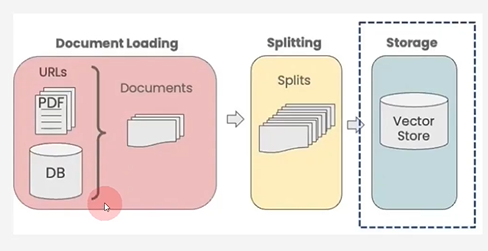


### 백터 데이터베이스 개념 : 벡터 데이터베이스의 주요 속성

- 백터저장 및 검색 지원
- 능숙한 유사도 검색 (코사인 유사도, 유클리드 거리와 같은 검색 이용)
- 임베딩 지원 : 청킹 데이터를 임베딩 과정을 거쳐서 벡터 데이터로 변환해서 저장한다
- 실시간 처리 : 데이터가 자주 변하는 경우 LLM 파인튜닝을 하기 어렵기 때문에 RAG를 이용하는것임으로 실시간 처리가 가능해야 된다
- 확장성 (계산 부하를 분산할 수 있는 수평적 확장 지원) -> 백터로 변환하는 임베딩 처리 과정에도 하드웨어가 필요하기 때문에 수평적 확장이 필요하다.

### 관계형 데이터베이스와 벡터 데이터베이스 차이
- 데이터 구조 : 관계형 데이터베이스는 테이블 형태의 구조화된 데이터를 다루며, 벡터 데이터 베이스는 고차원의 백터 데이터를 처리한다.  
    -> 관계형 데이터 베이스 : 자연어, 숫자 형태의 변형이 없이 그래로 이용한다 , 즉 구조화된 데이터 사용
    -> 벡터 데이터 베이스 : 벡터로 변환한 데이터를 사용한다
- 퀴리 방식 : 관계형 데이터베이스는 SQL을 통한 쿼리인 반면, 벡터 데이터베이스는 유사성 검색에 특화된 쿼리 방식을 사용
- 사례 : 관계형 데이터베이스는 전통적인 비즈니스 데이터 관리 사용하고, 벡터 데이터베이스는 머신 러닝 모델에서 생성된 데이터의 검색과 분석에 적합
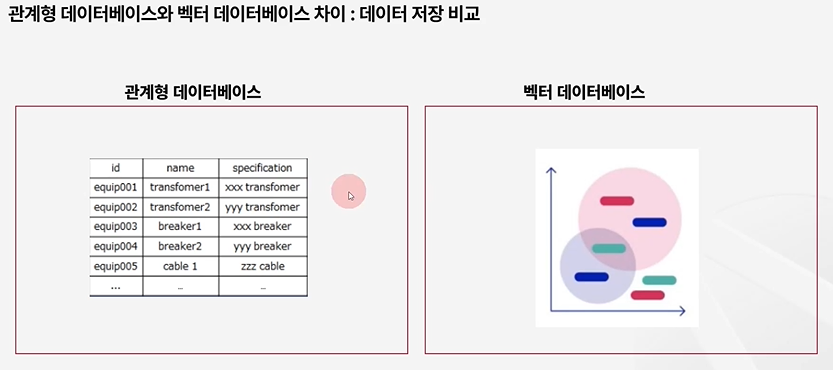
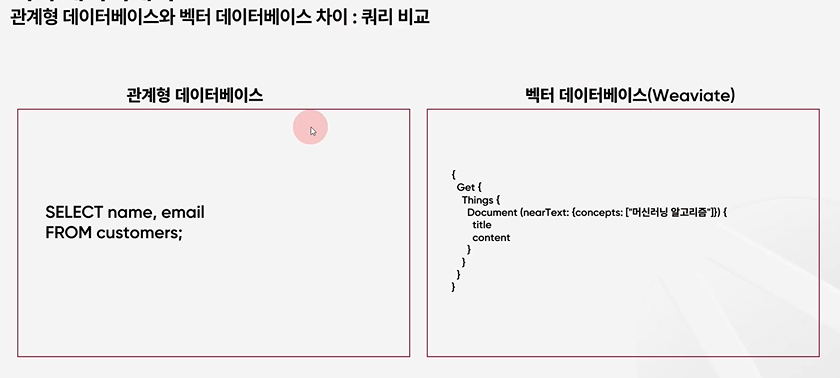  
=> 백터 데이터 베이스 : nearText (가장 근사치의 데이터를 가져오겠다)  
    단순하게 원하는 칼럼의 값을 가져오는 대신에 특정 좌표상의 위치에 있는 데이터의 가장 가까운 거리에 있는 데이터를 가져오는데 특화 된것이 벡터 데이터 베이스이다.

### 벡터 데이터베이스 유형

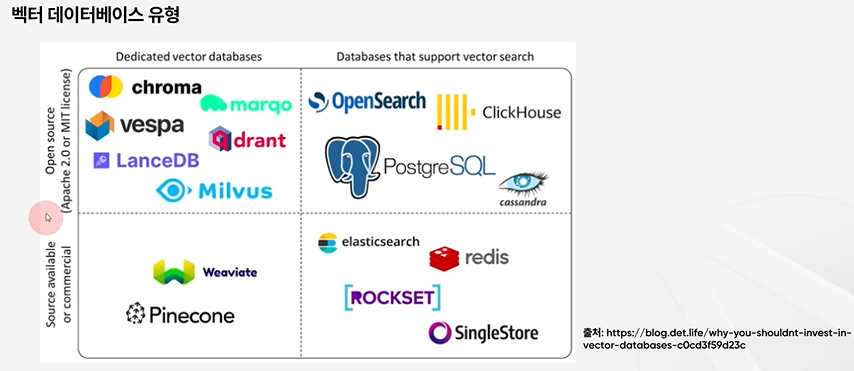
-> x축은 백터 데이터만 지원하는거냐, 백터 데이터도 지원하는것이냐  
-> y축은 오픈 소스냐 상용이나의 차이 

### 벡터 데이터베이스 유형 : 파인콘 (Pinecone)

-  머신러닝 모델에서 생성된 고차원 벡터 데이터를 저장하고, 백터들 사이에서 유사성 검색을 수행할 수 있는 인프라 제공
    - 장점 : 빠른 검색 및 쉬운 관리
    - 단점 : 비용

### 백터 데이터 베이스 유형 : 파이스 (FAISS)
- 페이스북에서 개발한 라이브러리로 대규모 벡터 집합에서 효율적으로 유사성 검색을 수행수 있도록 설계
    - 장점 : 오픈소스
    - 단점 : 사용의 복잡성, 특히 대구모 데이터셋의 경우 고성능의 검색 기능을 구현하기 위해 인덱싱 구조를 이해해야 함  

    => 인덱스 구조를 이해하고 인덱스 구조를 잘 구현해야 된다.

### 벡터 데이터 베이스 유형 : 크로마 
- LLM(대규모 언어 모델) 애플리케이션 개발을 간소화하도록 설계된 오픈 소스 임베딩 데이터베이스  
    -> 텍스트를 임베딩으로 변환하고 유사도 검색을 수행
- 주요 기능 
    - 쿼리, 필터링, 밀도 추정 등 다양한 기능을 갖추고 있음

### 벡터 데이터 베이스 유형 : 위비에이터
- 고차원 벡터 데이터의 저장과 검색을 지원하는 데이터베이스
    - 임베딩 과정 없이 자동으로 벡터화 처리
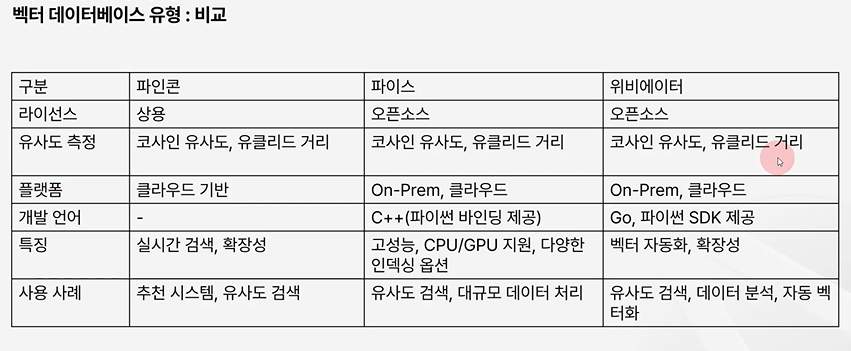


### 백터 데이터 베이스  
- 파이스 유사도 검색 예제


## CH.06 LLM에서 사용하는 백터 검색

### 벡터 데이터베이스 검색
- 백터 데이터 베이스에는 유사도 검색 (Similarity Search)과 MMR (Maximum Marginal Relevance) 가 있음

### 벡터 데이터베이스 검색 : 유사도 검색 (Similarity Search)
- 주어진 쿼리 또는 데이터 항목에 대해 가장 유사한 항목들을 데이터베이스나 데이터 집학에서 찾아내는 과정
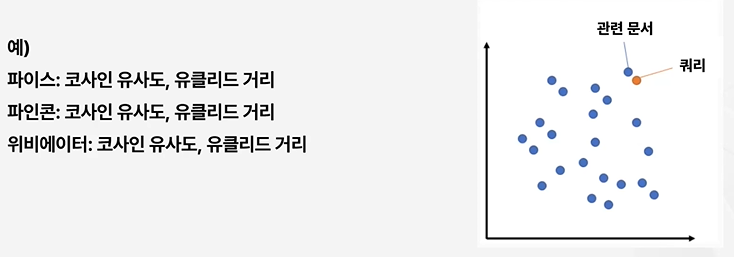  
-. 파랜색 점 : 백터로 저장한 데이터 / 쿼리 : 질문 

### 백터 데이터 베이스 검색  :  MMR
- MMR은 검색 결과의 다양성을 강화하는 중요한 방법. MMR의 기본 아이디어는 먼저 벡터 저장소에 쿼리하여, 가장 유사한 "fetch_k" 응답을 선택 후 "fetch_K" 응답 내에서 가장 다양한 "K" 응답을 선택
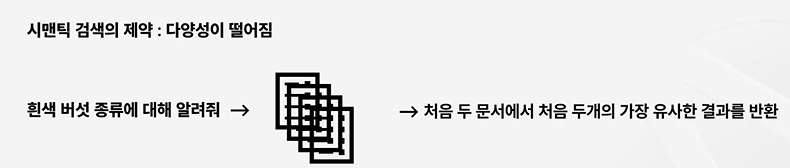  
=> 검색 결과의 다양성을 강화가 중요 포인트  
     즉 시멘틱 검색은 데이터를 찾아보는 범위가 좁지만(사용자의 의도 파악을 하기는 하지만 사용자의 대한 정보가 부족하면 다양성이 떨어지기 때문에)  MMR 검색 같은 경우에는 더 넓은 범위를 탐색한다 ?

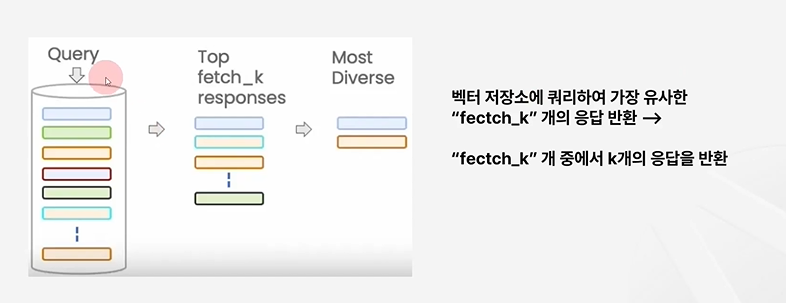  
=> 최종 검색 결과가 아니라 중간 중간 검색해서 정리한 내용 : fetch_K  (중요한것을 필터링 한다)





### 백터 데이터 베이스 인덱스 : FAISS 기준 인덱스

- 인덱스 생성 과정
    1. 데이터 전처리 후 벡터 변환
    2. 클러스터링 : K-Means Clustering 이용
    3. 인덱스 구축
        - 3-1) Flat index : Brute-force search로서 가장 높은 정확도를 제공하지만 계산이 많이 필요  
            모든 조합을 다 계산한다, 정확도는 좋지만 시간이 오래 걸린다.
        - 3-2) IVF(Inverted File Index) : 속도와 정확도가 좋으면, 중간 크기 ~ 대규모 데이터셋에 적합  

        - 3-3) Product Quantization : 메모리 사용을 줄이기 위해 벡터를 압축하여 사용하기 때문에 매우 큰 데이터셋에 적합  

        - 3-4) HNSW (Hierarchical Navigable Small World) : 그래프 기반 인덱스로 고차원 데이터에 효율적  
    
    => 주로 2,3 번을 많이 사용하면서, 두개 혹은 3개를 조합해서 사용한다

    4. 검색  
        - 4-1) 정확한 검색 : 가장 정답에 가까운 이웃을 찾아오지만, 검색 속도는 오래 걸릴 수 있음
        - 4-2) 근사 검색 : 말 그대로 유사한 (approximate)한 결과를 반환하지만 속도는 빠름
    
    5. 후처리 : Reranking  
        - 인덱스 구축하고 유사도 검색을 했는데도 검색 결과가 불 만족스러울때 후처리 작업 진행

 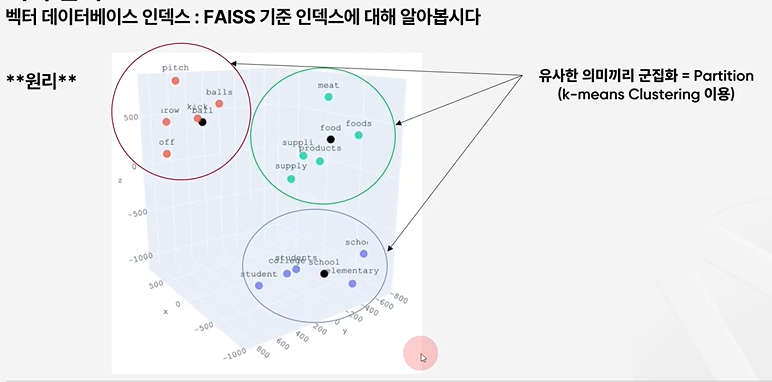  
 => 원을 기준으로 하나의 군집으로 모아준다 / 유의미한 군집을 Partition 으로 표현 할 수 있다

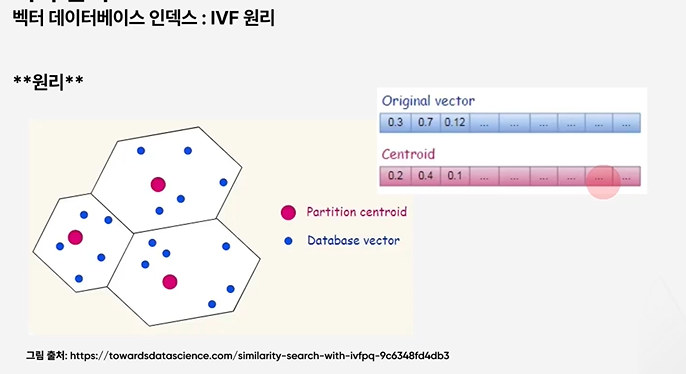  
=> 육각형이 각각의 Partition 이며 빨간색이 중간 값이다. / 군집 마다 각각의 벡터를 관리하면서 벡터의 중간 값도 관리를 하기 때문에 속도와 정확도가 좋다  
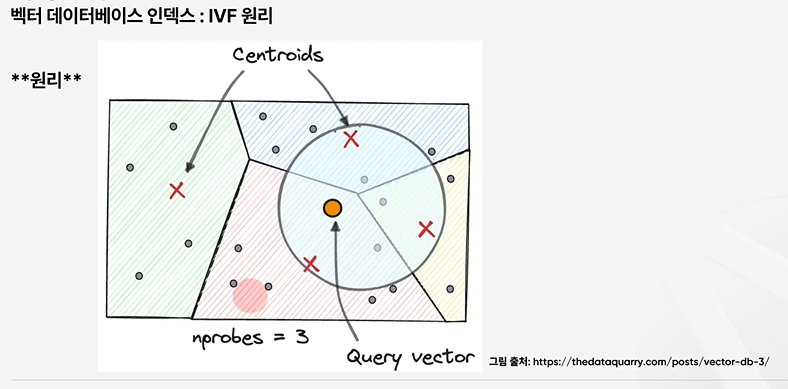  
=> 주황색이 사용자의 질문이라고 할때, 질문의 유사한 값을 찾을때 몇개의 군집을 이용할지 지정해줄 수 있다 "nprobes" 3개를 지정했기 때문에 원에 3개가 들어가는것 임
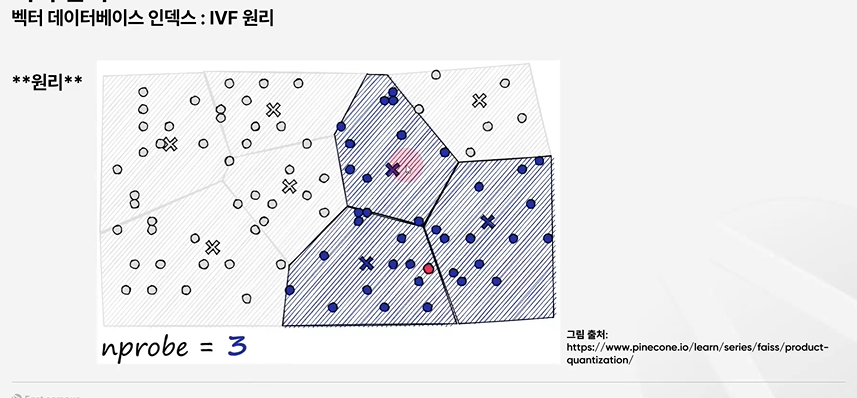
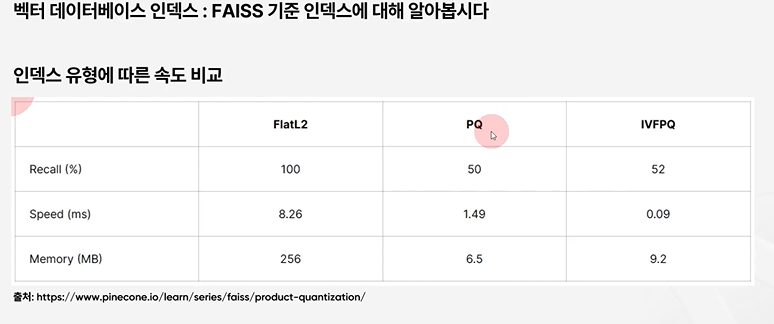  
=> FlatL2 : 클러스터를 만들떄 사용 IVF 사용  
    PQ :  
    IVFPQ : IVF와 PQ를 합쳐서 사용하는것

### 백터 검색 : Reranking
- Query를 하면 유사도 검색을 통해 문서를 반환하게 되는데, 이때 유사도가 가장 높은 순으로 ranking이 진행

- **Reranking**이 필요한 이유
    - RAG는 검색 시간 단축을 위해 Approximate Nearnest Neighbor search (ANNs) 기술을 활용하기 때문에 질문과 관계없는 문서가 검색될 가능성이 높음 (좌표상에서 질문이 들어오면 거리가 가까운 좌표를 기반으로 대답을 해주지만 가까운 좌표에 있는 벡터를 반환하는데 좌표 벡터에 질문과 유사한 질문의 답변이 있을지 없을지 정확하게 모르기 때문에 / 키워드 검색이 아니라 유사도 검색이기 때문에 관련성이 없는것도 검색이 될 수 있기 때문에 )

- 해결 방법
    1. 검색으로 반환되는 문서 수를 늘리기  
        -> 하지만 토큰의 제약으로 불가능
    2. Reranking : 관련 정보가 컨텍스트 내 상위에 존재하도록 함  

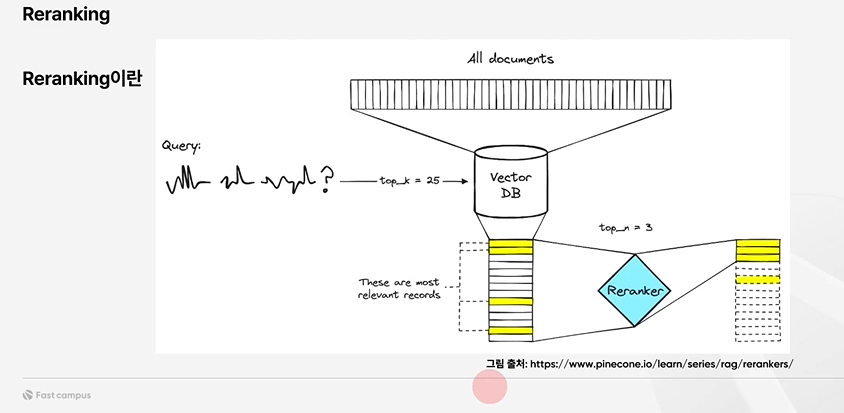  
=> 토큰 제약 떄문에 모든 데이터를 넘겨 줄수 없기 때문에 중요한것만 뽑아서 전달한다 /   
relevant records : vector 검색을 통해 나온 결과 (리트리버 결과를 말하는것인가?)



## CH.06 RAG 구현시 고려사항

### 답변 속도 및 정확도 : 답변속도

1. Chunk Size
2. 검색 속도 (파인콘, 파이스 > 엘라스틱 서치 > 크로마 등등)
3. OpenAI 모델 선택
4. 전반적인 아키텍처

### 답변 속도 및 정확도 : 정확도
1. Chunk_overlap
2. 검색 엔진 (하이브리드 검색 > 벡터 검색 > 시맨틱 검색)
3. Reranking

### 답변 속도 및 정확도 : 보안
1. 기업 보안 수준에 부합하는 아키텍처로 도입 (ex: 보안 솔루션, 네트워크 보안)
2. OpenAI API & Azure OpenAi 비교 검토하여 도입 -> 바로 API에 연결을 하는지 보안 서비스를 적용해서 API연결하는지 검토
3. 허용된 데이터에 한해서 사용 


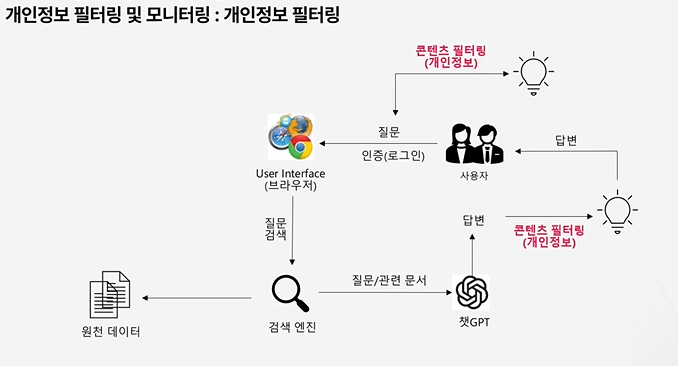  
-> 질문에서 민감 정보가 있으면 필터링이 필요  
-> 답변에서도 민감 정보가 있으면 필터링 필요  

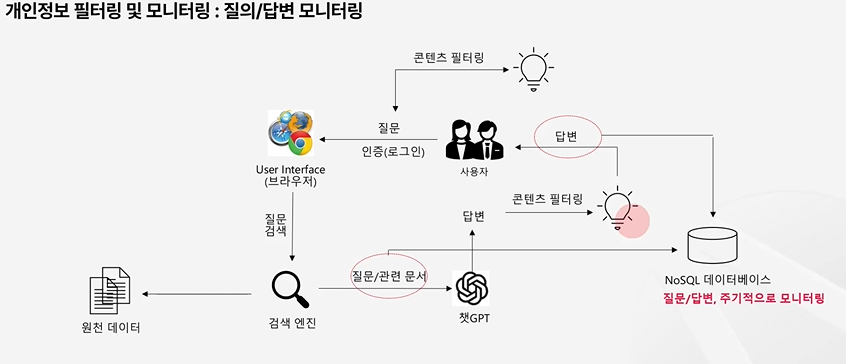


### 개인정보 필터링 및 모니터링 : 질의/답변 모니터링

- 모니터링 항목
    - 질문/답변
        1. 질문과 답변의 적정정/정확성
        2. 최신 데이터를 근거로 한 답변 유무
    - 토큰 사용량
        1. 인프라 사용 비용
        2. 토큰 사용 비용
    - 서비스 성능 (응답시간, 처리량 등)
    - 사용자 피드백




